# Análisis Exploratorio de Datos (EDA) y Preprocesamiento

Este cuaderno realiza un análisis exploratorio de los datos (EDA) enfocado en las variables **numéricas** del dataset. También se sugiere un preprocesamiento orientado a modelos de machine learning supervisados para predecir `TARGET_LABEL_BAD`.

## Unir datos con columnas

In [4]:
import os
import pandas as pd
from IPython.display import display, HTML

# Configuración para mostrar bien los DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

# === RUTAS ABSOLUTAS Y SEGURAS ===

# Ruta absoluta al archivo Excel con nombres de columnas
excel_path = os.path.abspath(os.path.join("data", "external", "PAKDD2010_VariablesList.XLS"))

# Ruta absoluta al archivo de datos .txt
txt_path = os.path.abspath(os.path.join("data", "external", "PAKDD2010_Modeling_Data.txt"))

# Ruta absoluta al archivo destino .csv
save_path = os.path.abspath(os.path.join("data", "processed", "data-with-columns.csv"))

# === LECTURA DE ARCHIVOS ===

# Leer archivo Excel (nombres de columnas)
if not os.path.exists(excel_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo Excel en: {excel_path}")

try:
    variables_df = pd.read_excel(excel_path)
    column_names = variables_df['Var_Title'].head(54).tolist()
except Exception as e:
    raise RuntimeError(f"❌ Error leyendo el archivo Excel: {e}")

# Leer archivo de datos .txt sin cabecera
if not os.path.exists(txt_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo de datos en: {txt_path}")

try:
    data_df = pd.read_csv(txt_path, sep='\t', header=None, encoding='latin1')
except Exception as e:
    raise RuntimeError(f"❌ Error leyendo el archivo de datos: {e}")

# Verificar que coincidan las columnas




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("./data/processed/data-with-columns.csv")
df.rename(columns={"TARGET_LABEL_BAD=1": "TARGET_LABEL_BAD"}, inplace=True)

numeric_df = df.select_dtypes(include=["int64", "float64"]).drop(columns=["ID_CLIENT"])
numeric_df.head()

,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL.1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD
0,5,0,1,6,1,0,1,1.0,15.0,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,0,9.0,4.0,NaN,NaN,0,0,0,0,1,32,1
1,15,0,1,2,0,0,1,1.0,1.0,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,0,11.0,4.0,11.0,NaN,0,0,0,0,1,34,1
2,5,0,1,2,0,0,1,1.0,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,11.0,NaN,NaN,NaN,0,0,0,0,1,27,0
3,20,0,1,2,0,0,1,NaN,NaN,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,1,61,0
4,10,0,1,2,0,0,1,1.0,12.0,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,0,9.0,5.0,NaN,NaN,0,0,0,0,1,48,1


## 0. Análisis de nulos

In [7]:
import pandas as pd

total_filas = len(numeric_df)

nulos_por_columna = pd.DataFrame({
    'columna': numeric_df.columns,
    'nulos': numeric_df.isnull().sum()
})
nulos_por_columna['porcentaje_nulos'] = (nulos_por_columna['nulos'] / total_filas) * 100

nulos_por_columna = nulos_por_columna[nulos_por_columna['nulos'] > 0].copy()

umbral = 30  # % de nulos a partir del cual se sugiere eliminar
nulos_por_columna['sugerencia'] = nulos_por_columna['porcentaje_nulos'].apply(
    lambda x: 'ELIMINAR' if x > umbral else 'CONSERVAR / IMPUTAR'
)

nulos_por_columna = nulos_por_columna.sort_values(by='porcentaje_nulos', ascending=False).reset_index(drop=True)

# Imprimir los resultados en modo texto
print("\nAnálisis de columnas con valores nulos:")
print("----------------------------------------")
for _, row in nulos_por_columna.iterrows():
    print(f"Columna: {row['columna']}")
    print(f"  → Nulos: {row['nulos']}")
    print(f"  → Porcentaje de nulos: {row['porcentaje_nulos']:.2f}%")
    print(f"  → Sugerencia: {row['sugerencia']}")
    print("")

print(f"Total de filas del dataframe: {total_filas}")




Análisis de columnas con valores nulos:
----------------------------------------
Columna: EDUCATION_LEVEL.1
  → Nulos: 32338
  → Porcentaje de nulos: 64.68%
  → Sugerencia: ELIMINAR

Columna: MATE_PROFESSION_CODE
  → Nulos: 28884
  → Porcentaje de nulos: 57.77%
  → Sugerencia: ELIMINAR

Columna: PROFESSION_CODE
  → Nulos: 7756
  → Porcentaje de nulos: 15.51%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: OCCUPATION_TYPE
  → Nulos: 7313
  → Porcentaje de nulos: 14.63%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: MONTHS_IN_RESIDENCE
  → Nulos: 3777
  → Porcentaje de nulos: 7.55%
  → Sugerencia: CONSERVAR / IMPUTAR

Columna: RESIDENCE_TYPE
  → Nulos: 1349
  → Porcentaje de nulos: 2.70%
  → Sugerencia: CONSERVAR / IMPUTAR

Total de filas del dataframe: 50000



## 1. Clasificación de las variables numéricas

Se clasifican como discretas o continuas según su naturaleza y variedad de valores.

| Variable                       | Tipo                          |
|--------------------------------|-------------------------------|
| PAYMENT_DAY                    | Numérico Discreto             |
| QUANT_ADDITIONAL_CARDS         | Numérico Discreto             |
| POSTAL_ADDRESS_TYPE            | Numérico Discreto             |
| MARITAL_STATUS                 | Numérico Discreto             |
| QUANT_DEPENDANTS               | Numérico Discreto             |
| EDUCATION_LEVEL                | Numérico Discreto             |
| NACIONALITY                    | Numérico Discreto             |
| RESIDENCE_TYPE                 | Numérico Discreto             |
| MONTHS_IN_RESIDENCE            | Numérico Continuo             |
| FLAG_EMAIL                     | Numérico Discreto             |
| PERSONAL_MONTHLY_INCOME        | Numérico Continuo             |
| OTHER_INCOMES                  | Numérico Continuo             |
| FLAG_VISA                      | Numérico Discreto             |
| FLAG_MASTERCARD                | Numérico Discreto             |
| FLAG_DINERS                    | Numérico Discreto             |
| FLAG_AMERICAN_EXPRESS          | Numérico Discreto             |
| FLAG_OTHER_CARDS               | Numérico Discreto             |
| QUANT_BANKING_ACCOUNTS         | Numérico Discreto             |
| QUANT_SPECIAL_BANKING_ACCOUNTS | Numérico Discreto             |
| PERSONAL_ASSETS_VALUE          | Numérico Continuo             |
| QUANT_CARS                     | Numérico Discreto             |
| MONTHS_IN_THE_JOB              | Numérico Continuo             |
| PROFESSION_CODE                | Numérico Discreto             |
| OCCUPATION_TYPE                | Numérico Discreto             |
| MATE_PROFESSION_CODE           | Numérico Discreto             |
| EDUCATION_LEVEL.1              | Numérico Discreto             |
| FLAG_HOME_ADDRESS_DOCUMENT     | Numérico Discreto             |
| FLAG_RG                        | Numérico Discreto             |
| FLAG_CPF                       | Numérico Discreto             |
| FLAG_INCOME_PROOF              | Numérico Discreto             |
| PRODUCT                        | Numérico Discreto             |
| AGE                            | Numérico Continuo o Discreto  |


## 2. Distribución de variables numéricas según `TARGET_LABEL_BAD`

Gráficos con análisis específicos según comportamiento observado.

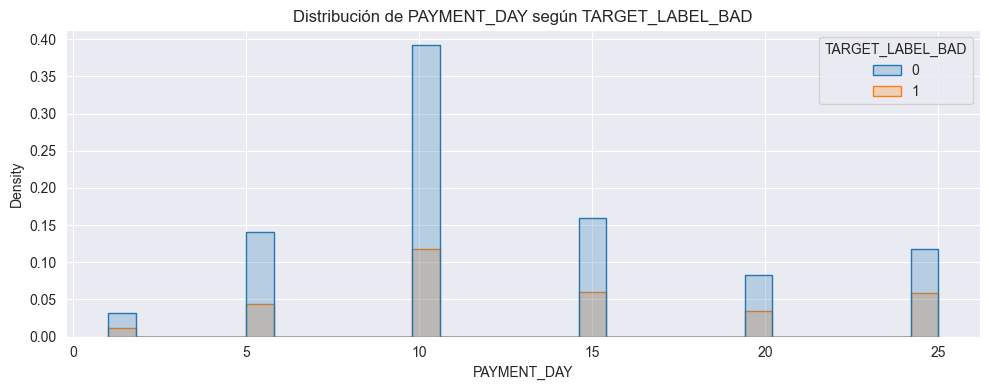

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PAYMENT_DAY", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PAYMENT_DAY según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `PAYMENT_DAY`**  
> * Más concentración el 10 .. pero tampoco indica a mi criterio que los que pagan el 10 sean malos pagagores.
> * Podría valer la pena transformarla a variables categóricas como:
early_month (1–10),
mid_month (11–20),
end_month (21–31),
y observar si así mejora la capacidad predictiva.?????

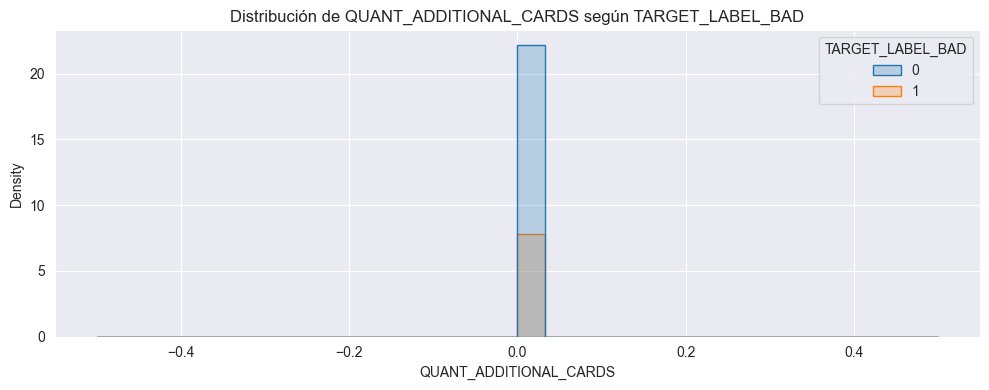

In [9]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_ADDITIONAL_CARDS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_ADDITIONAL_CARDS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_ADDITIONAL_CARDS`**  

> *Todos los valores son cero.. eliminar ??

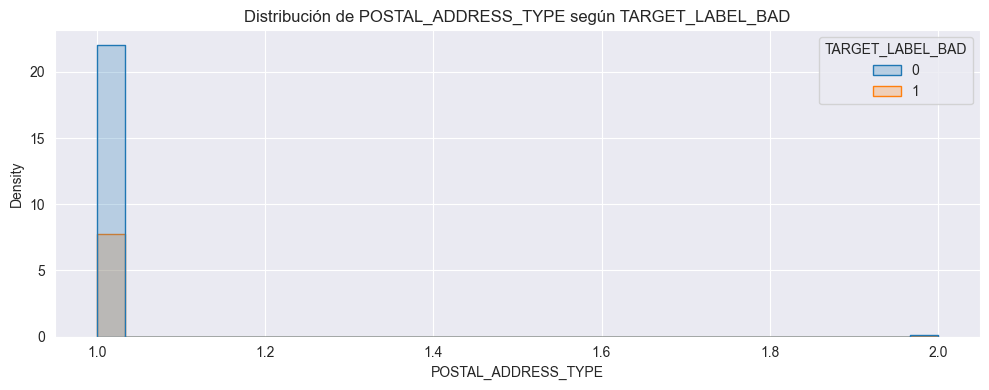

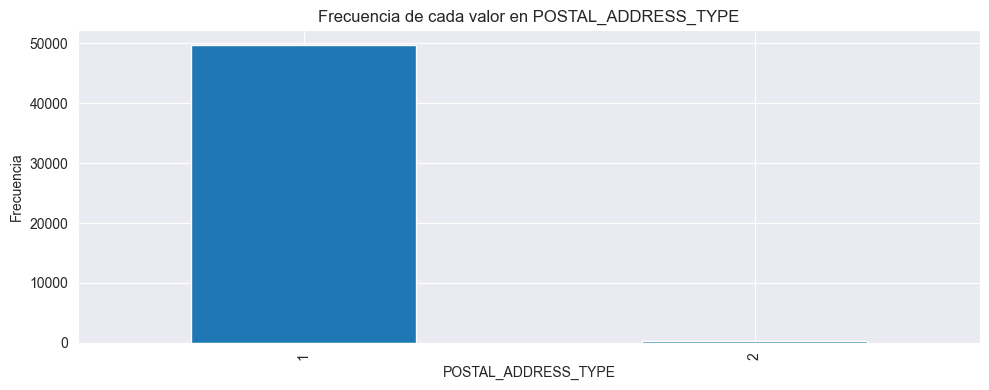

In [10]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="POSTAL_ADDRESS_TYPE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de POSTAL_ADDRESS_TYPE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()


conteo = df["POSTAL_ADDRESS_TYPE"].value_counts().sort_index()

plt.figure(figsize=(10, 4))
conteo.plot(kind="bar")
plt.title("Frecuencia de cada valor en POSTAL_ADDRESS_TYPE")
plt.xlabel("POSTAL_ADDRESS_TYPE")
plt.ylabel("Frecuencia")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



**Análisis para `POSTAL_ADDRESS_TYPE`**  

> *dado que la gran mayoría de los valores es siempre 1 , tal vez no sea relevante y convenga descartar.

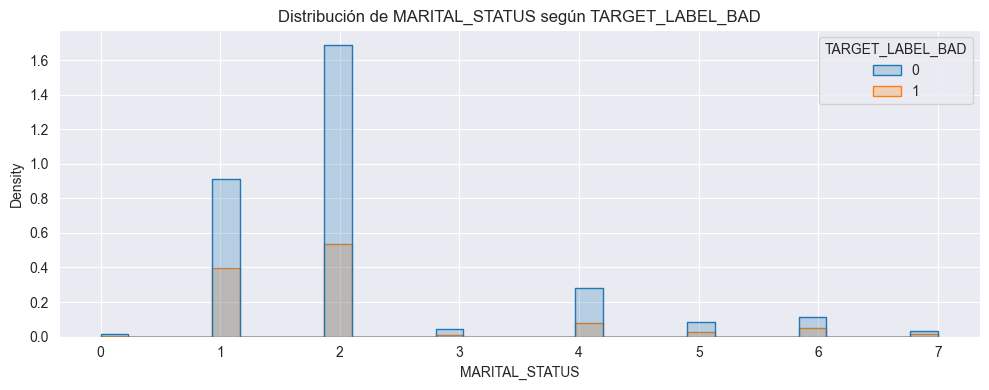

In [11]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MARITAL_STATUS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MARITAL_STATUS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()


**Análisis para `MARITAL_STATUS`**  
> *Se observa que quienes tienen  `MARITAL_STATUS` = 2 y 4 tienden a tener mayor proporción de TARGET_LABEL_BAD = 0, lo que sugiere que es un posible indicador de riesgo.

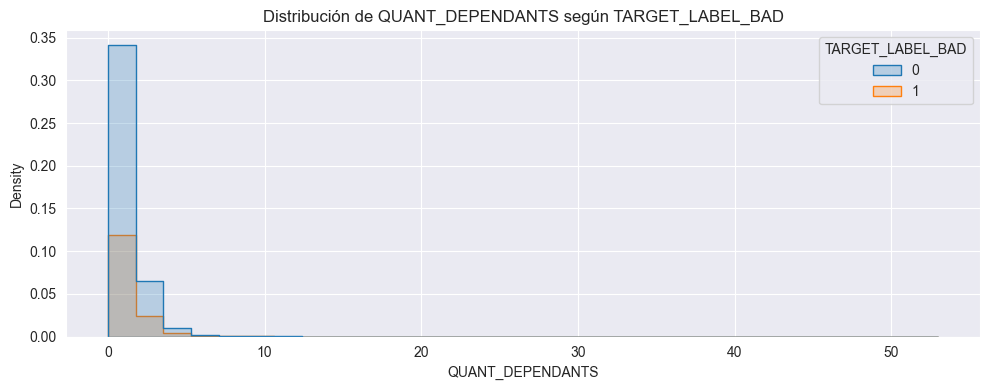

In [12]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_DEPENDANTS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_DEPENDANTS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_DEPENDANTS`**  

> *tener cero dependientes está asociado a mejor comportamiento de pago.
A partir de 1 o más dependientes, parece que la proporción de deudores aumenta gradualmente, aunque los datos son pocos

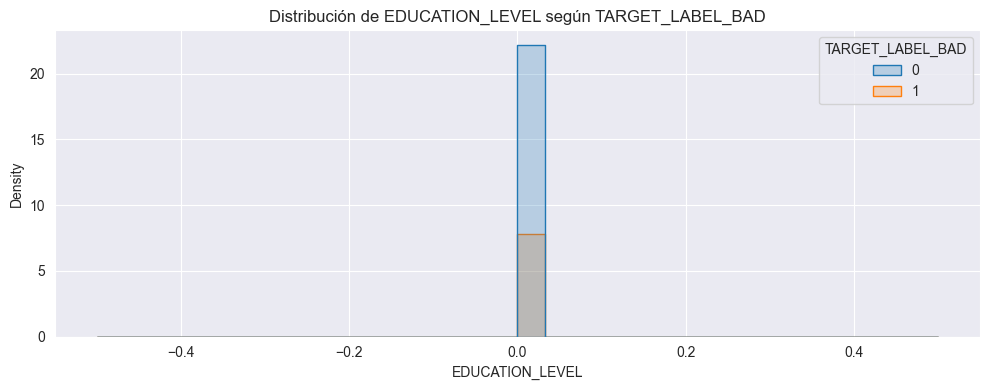

In [13]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="EDUCATION_LEVEL", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de EDUCATION_LEVEL según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `EDUCATION_LEVEL`**  
> *el valor es siempre 0.. para descartar

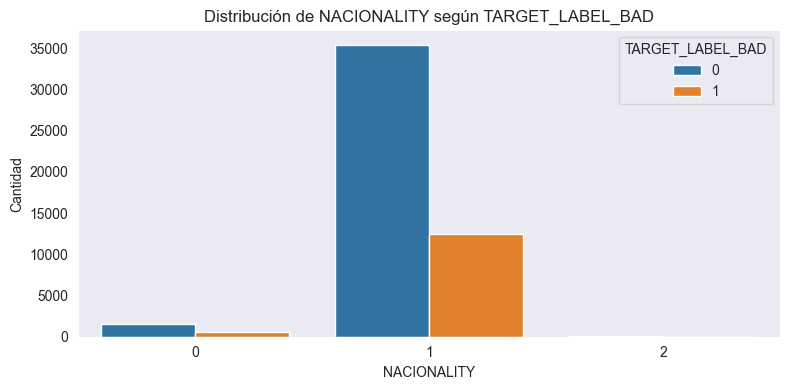

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="NACIONALITY", hue="TARGET_LABEL_BAD")
plt.title("Distribución de NACIONALITY según TARGET_LABEL_BAD")
plt.xlabel("NACIONALITY")
plt.ylabel("Cantidad")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


**Análisis para `NACIONALITY`**  

> *el 95% de los valores son de nacionalidad brasilera (48000 sobre 50000, luego 2000con valor 0 y 2 y 100 con valor 2.. no parece aportar.

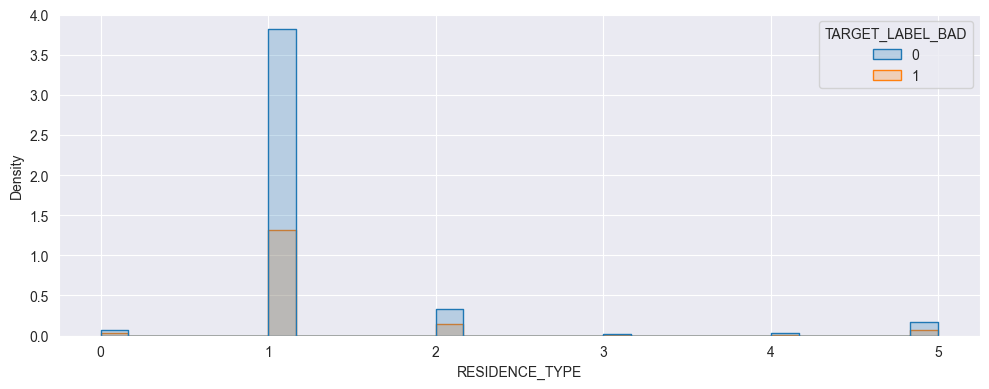

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
RESIDENCE_TYPE                                                             
0.0                           0.717105             0.282895             760
1.0                           0.743914             0.256086           41572
2.0                           0.703399             0.296601            3884
3.0                           0.801418             0.198582             141
4.0                           0.713826             0.286174             311
5.0                           0.710035             0.289965            1983


In [15]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="RESIDENCE_TYPE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.grid(True)
plt.tight_layout()
plt.show()

residence_dist = df.groupby('RESIDENCE_TYPE')['TARGET_LABEL_BAD'].value_counts(normalize=True).unstack().rename(
    columns={0: "Proporción Pagadores", 1: "Proporción Deudores"}
)

residence_dist["Cantidad Total"] = df['RESIDENCE_TYPE'].value_counts()

# Calcular el promedio general de pagadores y deudores
general_distribution = df['TARGET_LABEL_BAD'].value_counts(normalize=True).rename(
    {0: "Promedio Pagadores", 1: "Promedio Deudores"}
)


print(residence_dist)

**Análisis para `RESIDENCE_TYPE`**  
> *2 y 5 tienen una proporción más alta de deudores, la 3 y 1 tiene menos proporción de deudores.

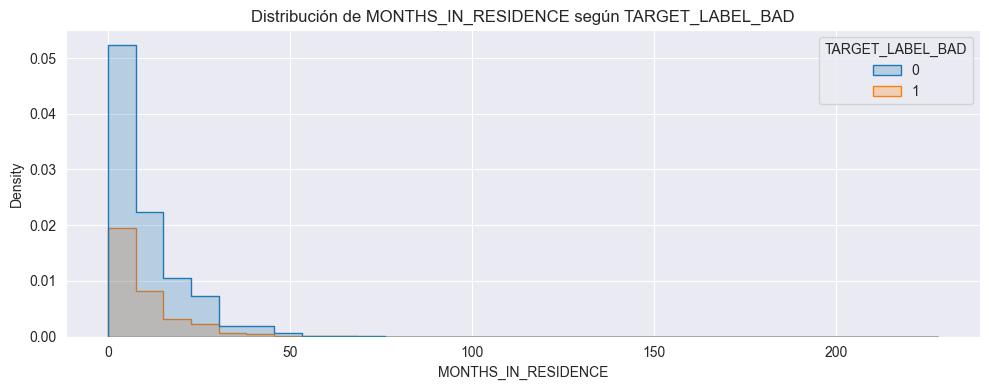

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
RESIDENCE_BIN                                                              
0-6                           0.728384             0.271616           24299
7-12                          0.729680             0.270320            8723
13-24                         0.759077             0.240923            8318
25-60                         0.767350             0.232650            4827
61-120                        0.722222             0.277778              54
120+                          0.000000             1.000000               2


In [16]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MONTHS_IN_RESIDENCE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MONTHS_IN_RESIDENCE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()


df.rename(columns={"TARGET_LABEL_BAD=1": "TARGET_LABEL_BAD"}, inplace=True)

# Definir los rangos para agrupar los meses de residencia
bins = [0, 6, 12, 24, 60, 120, float("inf")]
labels = ["0-6", "7-12", "13-24", "25-60", "61-120", "120+"]

# Crear una nueva columna con los rangos
df["RESIDENCE_BIN"] = pd.cut(df["MONTHS_IN_RESIDENCE"], bins=bins, labels=labels, include_lowest=True)

residence_bin_dist = df.groupby("RESIDENCE_BIN")["TARGET_LABEL_BAD"].value_counts(normalize=True).unstack().rename(
    columns={0: "Proporción Pagadores", 1: "Proporción Deudores"}
)

residence_bin_dist["Cantidad Total"] = df["RESIDENCE_BIN"].value_counts()

# Mostrar la tabla
print(residence_bin_dist)


**Análisis para `MONTHS_IN_RESIDENCE`**  
> * quienes tienen menos `MONTHS_IN_RESIDENCE` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1

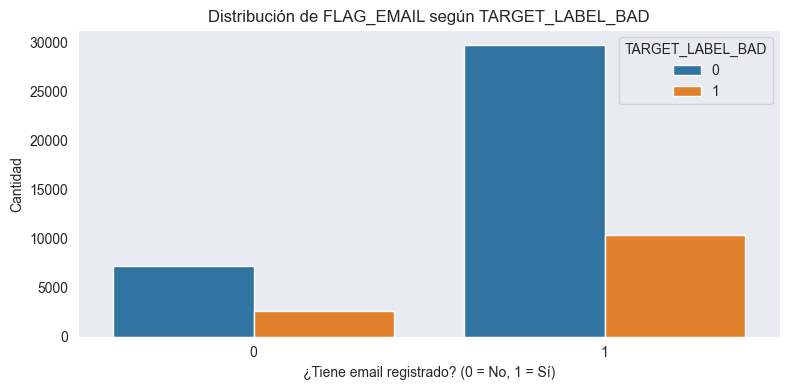

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="FLAG_EMAIL", hue="TARGET_LABEL_BAD")
plt.title("Distribución de FLAG_EMAIL según TARGET_LABEL_BAD")
plt.xlabel("¿Tiene email registrado? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Análisis para `FLAG_EMAIL`**  
> *Los clientes que tienen email FLAG_EMAIL = 1 tienen una proporción de deudores de 25.9%, levemente inferior al promedio.
Los que no tienen email ((FLAG_EMAIL = 0) tienen una proporción de deudores de 26.8%. NO PARECE ser muy relevante.

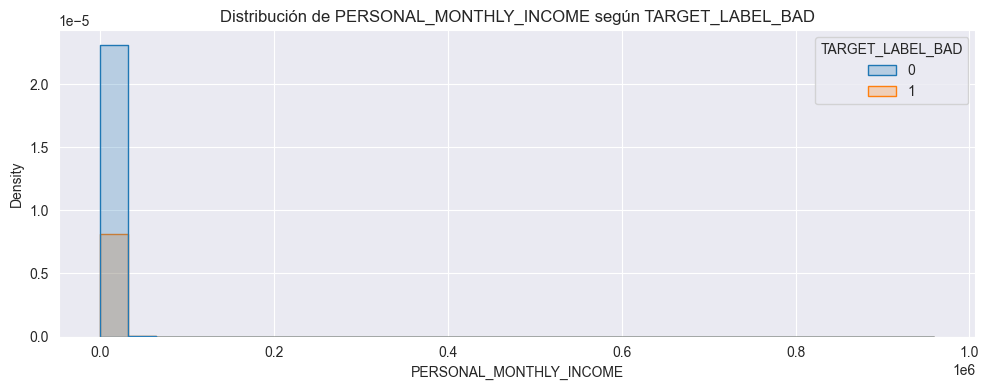

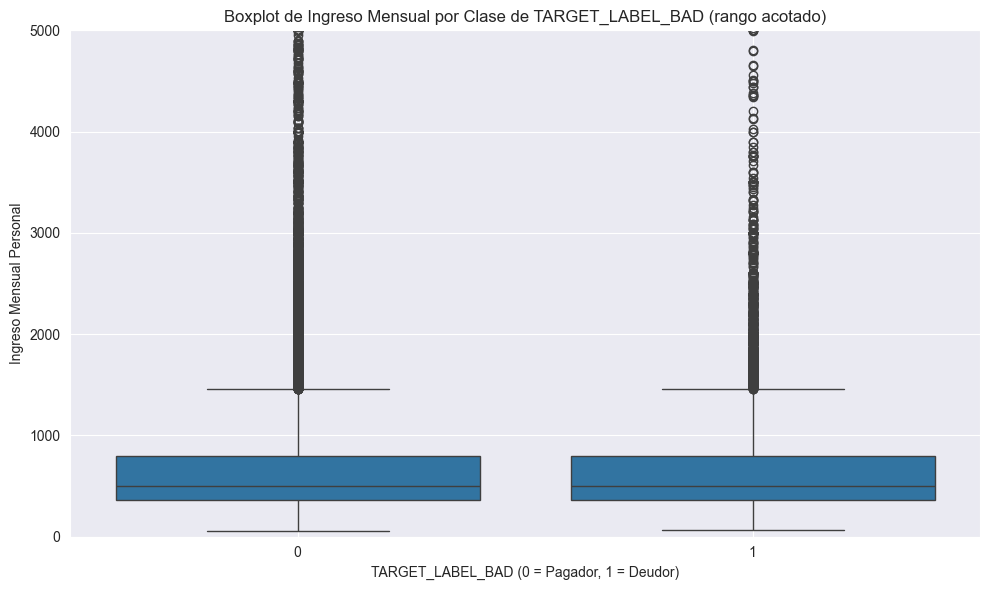

In [18]:
# Gráfico de distribución para PERSONAL_MONTHLY_INCOME
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PERSONAL_MONTHLY_INCOME", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PERSONAL_MONTHLY_INCOME según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="TARGET_LABEL_BAD", y="PERSONAL_MONTHLY_INCOME")
plt.ylim(0, 5000)
plt.title("Boxplot de Ingreso Mensual por Clase de TARGET_LABEL_BAD (rango acotado)")
plt.xlabel("TARGET_LABEL_BAD (0 = Pagador, 1 = Deudor)")
plt.ylabel("Ingreso Mensual Personal")
plt.grid(True)
plt.tight_layout()
plt.show()


**Análisis para `PERSONAL_MONTHLY_INCOME`**  
> *muchos outliers en `PERSONAL_MONTHLY_INCOME` , no se ve clara relacíon ingresos-morosidad

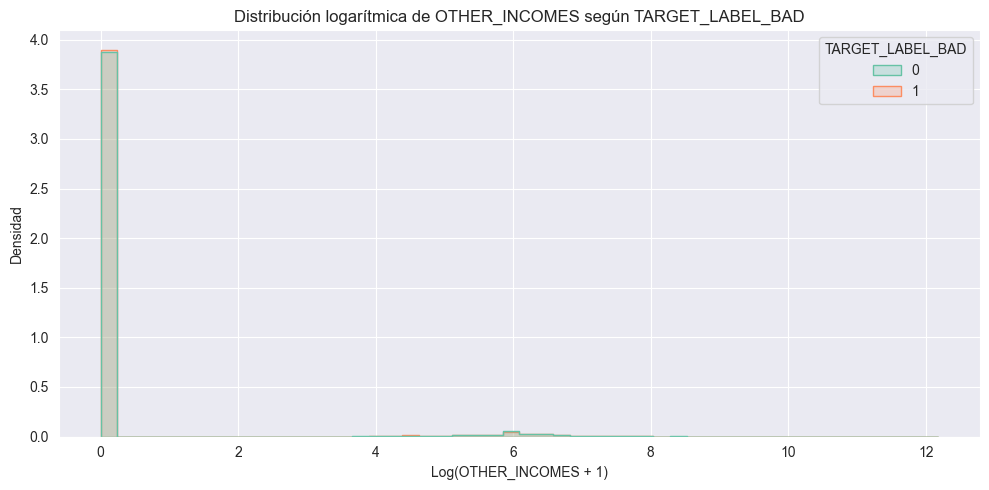

In [19]:


# Crear columna logarítmica (agregando 1 para evitar log(0))
df["LOG_OTHER_INCOMES"] = np.log1p(df["OTHER_INCOMES"])

# Gráfico de distribución log-transformado
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x="LOG_OTHER_INCOMES",
    hue="TARGET_LABEL_BAD",
    bins=50,
    element="step",
    stat="density",
    common_norm=False,
    palette="Set2"
)
plt.title("Distribución logarítmica de OTHER_INCOMES según TARGET_LABEL_BAD")
plt.xlabel("Log(OTHER_INCOMES + 1)")
plt.ylabel("Densidad")
plt.grid(True)
plt.tight_layout()
plt.show()


**Análisis para `OTHER_INCOMES`**  

> *La gran mayoría de los clientes, tanto pagadores (label 0) como deudores (label 1), no tienen otros ingresos o tienen valores mínimos.

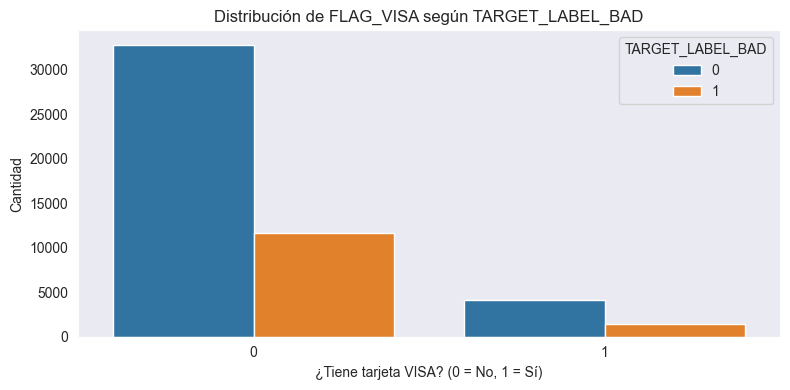

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_VISA                                                                  
0                             0.738341             0.261659           44428
1                             0.745872             0.254128            5572


In [20]:
# Gráfico de barras para FLAG_VISA
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="FLAG_VISA", hue="TARGET_LABEL_BAD")
plt.title("Distribución de FLAG_VISA según TARGET_LABEL_BAD")
plt.xlabel("¿Tiene tarjeta VISA? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tabla de proporciones y cantidad total
visa_dist = (
    df.groupby("FLAG_VISA")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores", 1: "Proporción Deudores"})
)

visa_dist["Cantidad Total"] = df["FLAG_VISA"].value_counts()
print(visa_dist)


**Análisis para `FLAG_VISA`**  

> *Se observa que quienes tienen menos `FLAG_VISA` tienden a tener mayor proporción de TARGET_LABEL_BAD = 1.

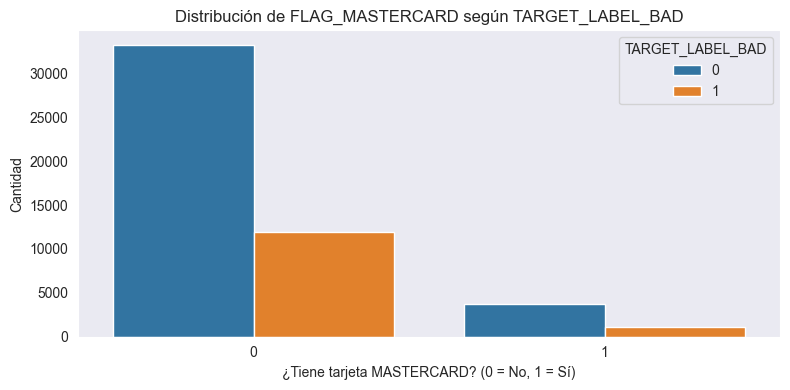

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_MASTERCARD                                                            
0                             0.736632             0.263368           45127
1                             0.762774             0.237226            4873


In [21]:
# Gráfico de barras para FLAG_MASTERCARD
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="FLAG_MASTERCARD", hue="TARGET_LABEL_BAD")
plt.title("Distribución de FLAG_MASTERCARD según TARGET_LABEL_BAD")
plt.xlabel("¿Tiene tarjeta MASTERCARD? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tabla de proporciones y cantidad total
mast_dist = (
    df.groupby("FLAG_MASTERCARD")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores", 1: "Proporción Deudores"})
)

mast_dist["Cantidad Total"] = df["FLAG_MASTERCARD"].value_counts()
print(mast_dist)



**Análisis para `FLAG_MASTERCARD`**  
> * es más marcada que en FLAG_VISA:
>   * Clientes con Mastercard (FLAG_MASTERCARD = 1) tienen una proporción de deudores de 23.7%.
>   * Clientes con (FLAG_MASTERCARD = 0) tienen una proporción de deudores de 26.3%.



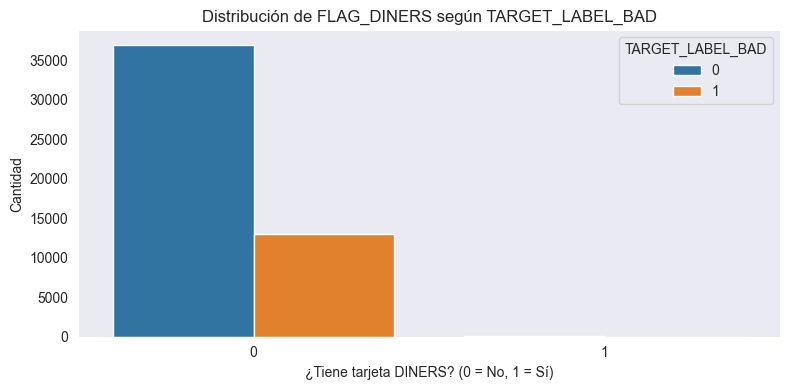

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_DINERS                                                                
0                             0.739216             0.260784           49934
1                             0.712121             0.287879              66


In [22]:
# Gráfico de barras para FLAG_DINERS
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="FLAG_DINERS", hue="TARGET_LABEL_BAD")
plt.title("Distribución de FLAG_DINERS según TARGET_LABEL_BAD")
plt.xlabel("¿Tiene tarjeta DINERS? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tabla de proporciones y cantidad total
diners_dist = (
    df.groupby("FLAG_DINERS")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores", 1: "Proporción Deudores"})
)

diners_dist["Cantidad Total"] = df["FLAG_DINERS"].value_counts()
print(diners_dist)


**Análisis para `FLAG_DINERS`**  
> *El muestreo es muy chico (solo 66 tienen diners) , habría que eliminarlo.

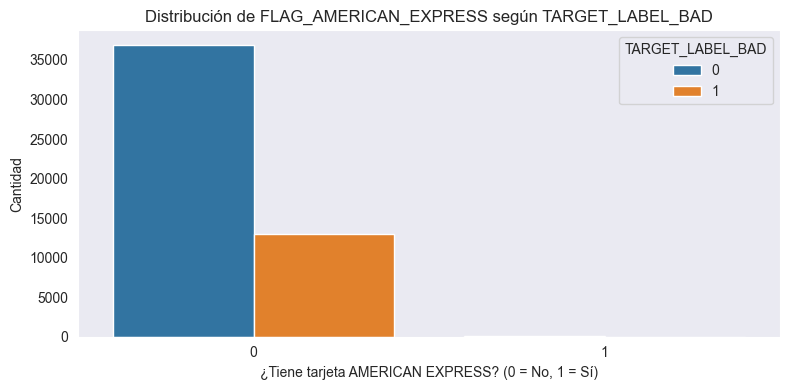

TARGET_LABEL_BAD       Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_AMERICAN_EXPRESS                                                           
0                                  0.739186             0.260814           49913
1                                  0.735632             0.264368              87


In [23]:
# Gráfico de barras para FLAG_AMERICAN_EXPRESS
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="FLAG_AMERICAN_EXPRESS", hue="TARGET_LABEL_BAD")
plt.title("Distribución de FLAG_AMERICAN_EXPRESS según TARGET_LABEL_BAD")
plt.xlabel("¿Tiene tarjeta AMERICAN EXPRESS? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tabla de proporciones y cantidad total
ae_dist = (
    df.groupby("FLAG_AMERICAN_EXPRESS")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores", 1: "Proporción Deudores"})
)

ae_dist["Cantidad Total"] = df["FLAG_AMERICAN_EXPRESS"].value_counts()

print(ae_dist)  # Corregido: antes se imprimía diners_dist por error


**Análisis para `FLAG_AMERICAN_EXPRESS`**  
> *Solo 66 personas tienen Diners haciendo muy chico el muestreo , tal vez mejor hacer un nuevo feature sumarizando todas las tarjetas

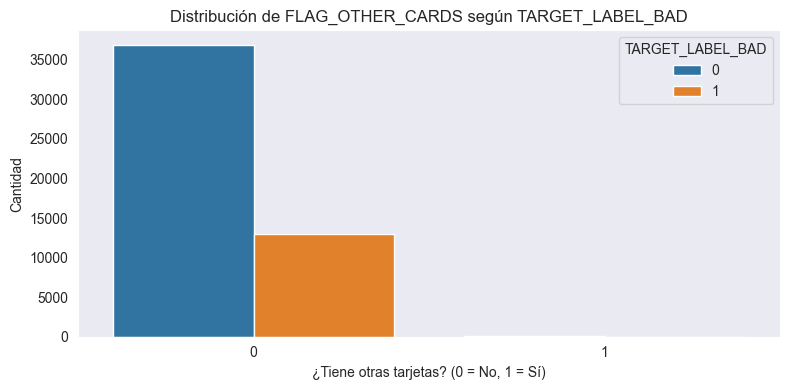

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
FLAG_OTHER_CARDS                                                           
0                             0.739208             0.260792           49898
1                             0.725490             0.274510             102


In [24]:
# Gráfico de barras para FLAG_OTHER_CARDS
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="FLAG_OTHER_CARDS", hue="TARGET_LABEL_BAD")
plt.title("Distribución de FLAG_OTHER_CARDS según TARGET_LABEL_BAD")
plt.xlabel("¿Tiene otras tarjetas? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tabla de proporciones y cantidad total
OC_dist = (
    df.groupby("FLAG_OTHER_CARDS")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores", 1: "Proporción Deudores"})
)

OC_dist["Cantidad Total"] = df["FLAG_OTHER_CARDS"].value_counts()
print(OC_dist)


**Análisis para `FLAG_OTHER_CARDS`**  
> *aquellos que tienen otras tarjetas son un poco mas deudores.

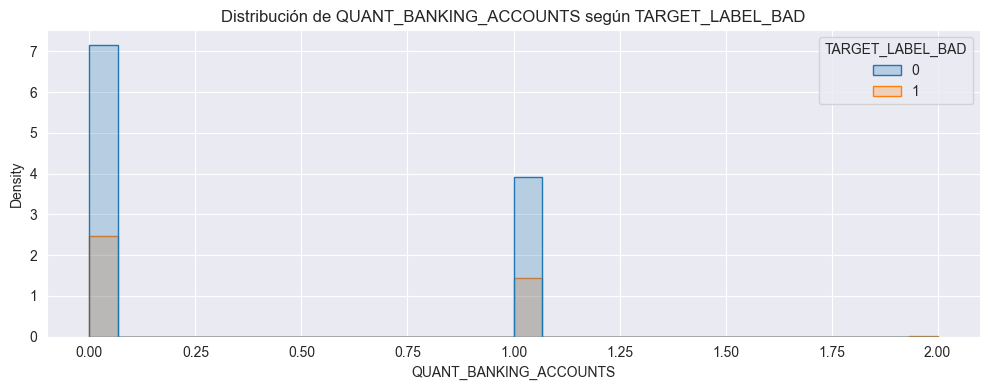

In [25]:
# Gráfico de distribución para QUANT_BANKING_ACCOUNTS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_BANKING_ACCOUNTS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_BANKING_ACCOUNTS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

## NUEVA FEATURE SUMARIZANDO TODAS LAS TARJETAS


In [26]:

# Crear la feature combinada
df["CANTIDAD_TARJETAS"] = df[[
    "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS",
    "FLAG_AMERICAN_EXPRESS", "FLAG_OTHER_CARDS"
]].sum(axis=1)

# Calcular proporción de pagadores y deudores por cantidad de tarjetas
card_count_dist = df.groupby("CANTIDAD_TARJETAS")["TARGET_LABEL_BAD"].value_counts(normalize=True).unstack().rename(
    columns={0: "Proporción Pagadores", 1: "Proporción Deudores"}
)

# Agregar la cantidad total por grupo
card_count_dist["Cantidad Total"] = df["CANTIDAD_TARJETAS"].value_counts()

# Mostrar la tabla
print(card_count_dist)


TARGET_LABEL_BAD   Proporción Pagadores  Proporción Deudores  Cantidad Total
CANTIDAD_TARJETAS                                                           
0                              0.737106             0.262894           41804
1                              0.743015             0.256985            5798
2                              0.767200             0.232800            2311
3                              0.764706             0.235294              68
4                              0.631579             0.368421              19


##Analisis para nueva feature CANTIDAD_TARJETAS que aúna todos los features de tarjetas

>A medida que aumenta la cantidad de tarjetas, en general baja la proporción de deudores:
>
   > 0 tarjetas → 26.3% de deudores
   >
   > 1 tarjeta → 25.7%
   >
   > 2 tarjetas → 23.3%
   >
   > 3 tarjetas → 23.5%
   >
>..cuando alguien tiene 4 tarjetas o más, el riesgo sube fuerte al 36.8%, aunque con pocos casos

**Análisis para `QUANT_BANKING_ACCOUNTS`**  
> *Clientes con:
>
>0 cuentas → 25.7% de deudores
>
>1 cuenta → 26.7% de deudores
>
>2 cuentas → ⚠ 57.1% de deudores! pero solo 14 casos, poco representativo
>


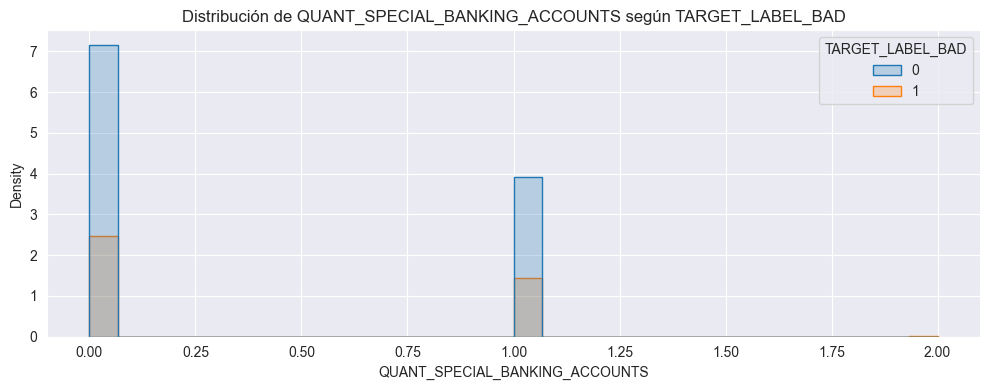

In [27]:
# Gráfico de distribución para QUANT_SPECIAL_BANKING_ACCOUNTS
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="QUANT_SPECIAL_BANKING_ACCOUNTS", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de QUANT_SPECIAL_BANKING_ACCOUNTS según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `QUANT_SPECIAL_BANKING_ACCOUNTS`**  
> *tiene exactamente lo mismo que QUANT_BANKING_ACCOUNTS , eliminar

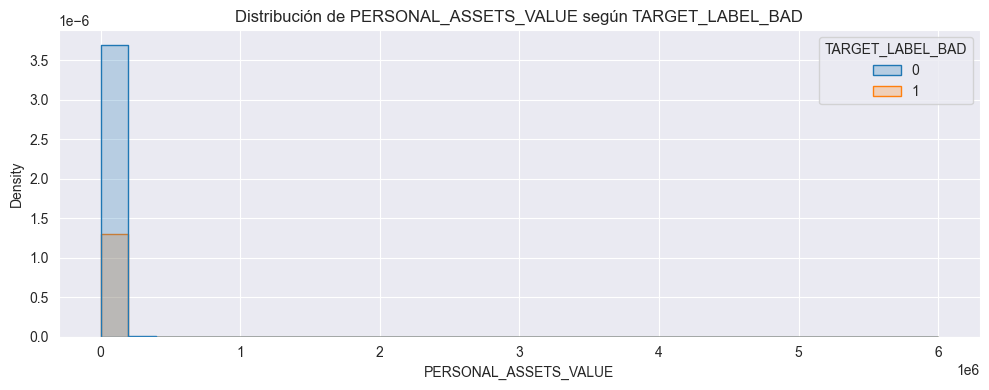

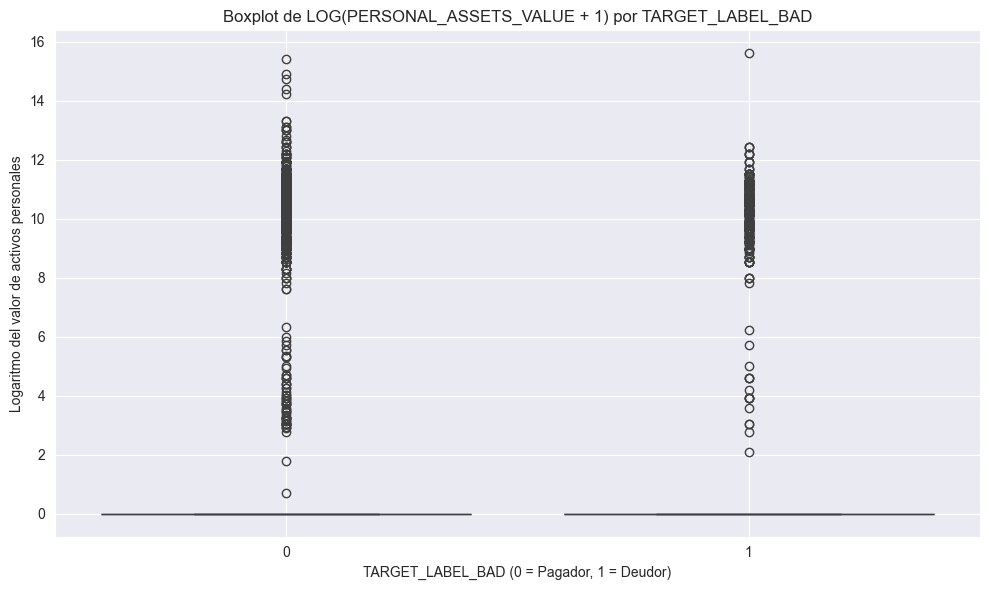

In [28]:
# Gráfico de distribución para PERSONAL_ASSETS_VALUE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PERSONAL_ASSETS_VALUE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PERSONAL_ASSETS_VALUE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()



# Cargar dataset y renombrar columna target si es necesario
df.rename(columns={"TARGET_LABEL_BAD=1": "TARGET_LABEL_BAD"}, inplace=True)

# Crear columna logarítmica para activos personales
df["LOG_ASSET_VALUE"] = np.log1p(df["PERSONAL_ASSETS_VALUE"])

# Boxplot para comparar según TARGET_LABEL_BAD
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="TARGET_LABEL_BAD", y="LOG_ASSET_VALUE")
plt.title("Boxplot de LOG(PERSONAL_ASSETS_VALUE + 1) por TARGET_LABEL_BAD")
plt.xlabel("TARGET_LABEL_BAD (0 = Pagador, 1 = Deudor)")
plt.ylabel("Logaritmo del valor de activos personales")
plt.grid(True)
plt.tight_layout()
plt.show()


**Análisis para `PERSONAL_ASSETS_VALUE`**  

> *La mediana es 0 en ambos grupos → la mayoría de los clientes no declaran activos personales.
>
La media es un poco más alta en los pagadores ($2.420 vs. $2.045), pero esa diferencia está inflada por outliers extremos (valores de hasta $6.000.000).

- tal vez haya que crear una feature binaria indicando quien declaró y quien no , combinarla luego con otras features.

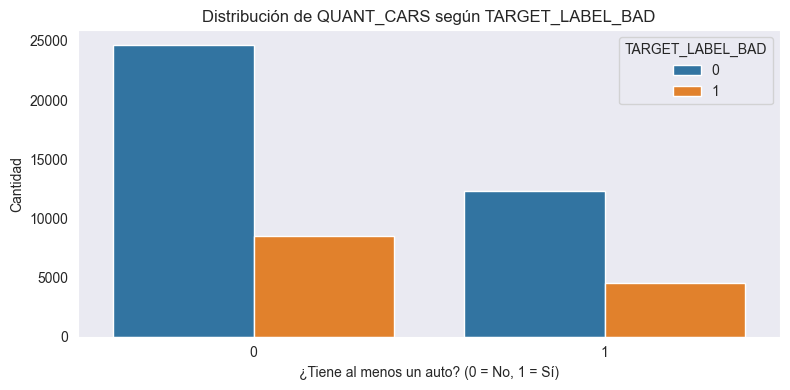

TARGET_LABEL_BAD  Proporción Pagadores  Proporción Deudores  Cantidad Total
QUANT_CARS                                                                 
0                             0.742837             0.257163           33193
1                             0.731957             0.268043           16807


In [29]:
# Gráfico de barras para QUANT_CARS
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="QUANT_CARS", hue="TARGET_LABEL_BAD")
plt.title("Distribución de QUANT_CARS según TARGET_LABEL_BAD")
plt.xlabel("¿Tiene al menos un auto? (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tabla de proporciones por cantidad de autos
cars_dist = (
    df.groupby("QUANT_CARS")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores", 1: "Proporción Deudores"})
)

cars_dist["Cantidad Total"] = df["QUANT_CARS"].value_counts()
print(cars_dist)



**Análisis para `QUANT_CARS`**  
> *mimina relación .. los que tienen autos son mínimamente más deudores...

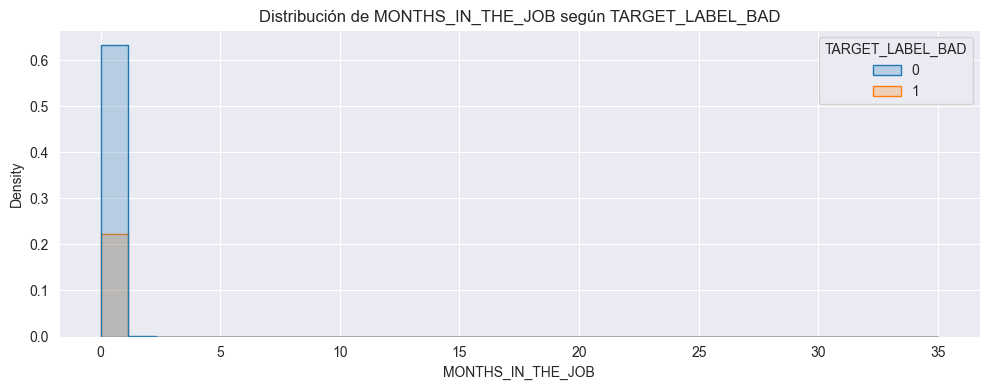

In [30]:
# Gráfico de distribución para MONTHS_IN_THE_JOB
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MONTHS_IN_THE_JOB", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MONTHS_IN_THE_JOB según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `MONTHS_IN_THE_JOB`**  

> *el 99.85 % es cero . descartar ?

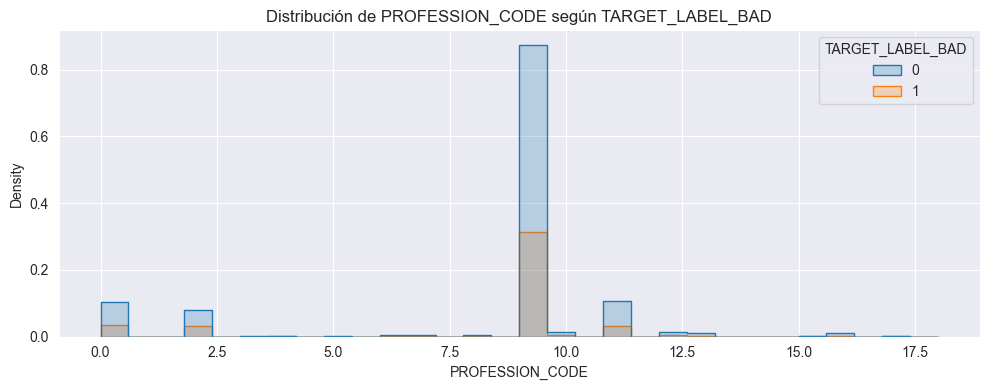

In [31]:
# Gráfico de distribución para PROFESSION_CODE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="PROFESSION_CODE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de PROFESSION_CODE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `PROFESSION_CODE`**
>
> tiene 15% de nulos.. ver cómo imputar
> *PROFESSION_CODE = 0 → 25.1% de deudores
>
>PROFESSION_CODE = 2 → 28.8% de deudores (más riesgoso)

>PROFESSION_CODE = 6 → 20.6% de deudores (menos riesgoso)

>Códigos como 3 y 4 también tienen diferencias, aunque con pocos casos.


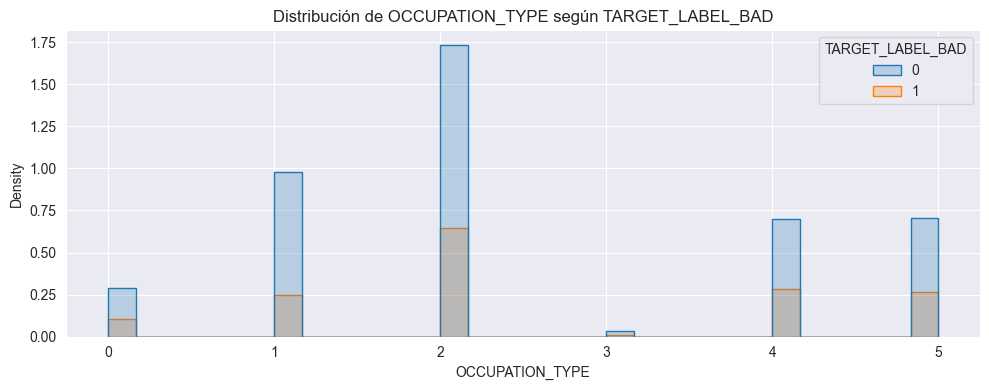

TARGET_LABEL_BAD  Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
OCCUPATION_TYPE                                                                    
0.0                                  74.00                    26.00            2788
1.0                                  79.68                    20.32            8742
2.0                                  72.80                    27.20           16947
3.0                                  75.55                    24.45             319
4.0                                  71.06                    28.94            7000
5.0                                  72.82                    27.18            6891


In [32]:
# Gráfico de distribución para OCCUPATION_TYPE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="OCCUPATION_TYPE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de OCCUPATION_TYPE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()



# Seleccionar los tipos de ocupación más comunes (opcional, acá se usan todos)
top_occupation_types = df["OCCUPATION_TYPE"].value_counts().index

# Calcular proporciones por tipo de ocupación
occupation_dist = (
    df[df["OCCUPATION_TYPE"].isin(top_occupation_types)]
    .groupby("OCCUPATION_TYPE")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores (%)", 1: "Proporción Deudores (%)"})
    * 100  # convertir a porcentaje
)

# Agregar cantidad total
occupation_dist["Cantidad Total"] = df["OCCUPATION_TYPE"].value_counts().loc[top_occupation_types]

# Redondear
occupation_dist = occupation_dist.round(2)

# Mostrar
print(occupation_dist)


**Análisis para `OCCUPATION_TYPE`**  
> * VER COMO IMPUTAR LOS NULOS
> * Coordinar con education_level?
> * OCCUPATION_TYPE = 1 → 20.3% de deudores (más bajo)
> * OCCUPATION_TYPE = 4 → 28.9% de deudores (más alto)
> * OCCUPATION_TYPE = 2 (el más frecuente) → 27.2%
> * OCCUPATION_TYPE = 3 y 0 tienen valores intermedios
> * está fuertemente correlacionado con el riesgo crediticio.

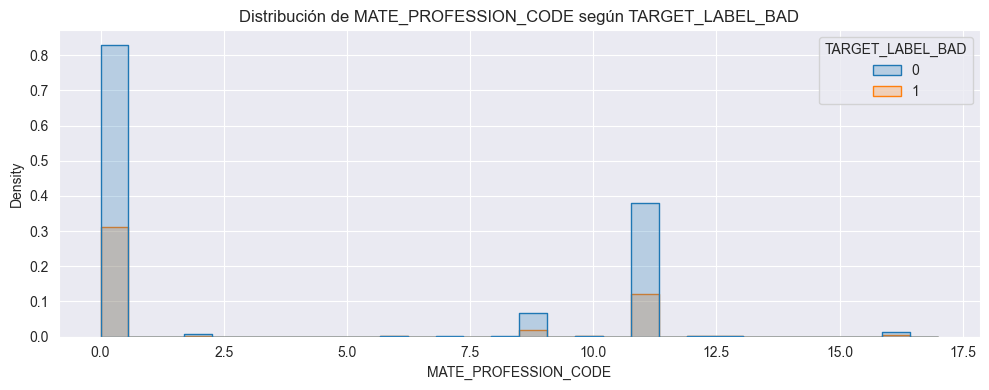

TARGET_LABEL_BAD      Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
MATE_PROFESSION_CODE                                                                   
0.0                                      72.76                    27.24           13632
2.0                                      82.73                    17.27             110
5.0                                     100.00                      NaN               1
6.0                                      75.00                    25.00              16
7.0                                     100.00                      NaN              11
8.0                                      85.71                    14.29               7
9.0                                      77.49                    22.51            1035
10.0                                     67.74                    32.26              31
11.0                                     75.62                    24.38            6005
12.0                            

In [33]:
# Gráfico de distribución para MATE_PROFESSION_CODE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="MATE_PROFESSION_CODE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de MATE_PROFESSION_CODE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular distribución en porcentaje para los más frecuentes
top_mate_prof = df["MATE_PROFESSION_CODE"].value_counts().nlargest(15).index

mate_prof_dist = (
    df[df["MATE_PROFESSION_CODE"].isin(top_mate_prof)]
    .groupby("MATE_PROFESSION_CODE")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores (%)", 1: "Proporción Deudores (%)"})
    * 100
)

# Agregar cantidad total
mate_prof_dist["Cantidad Total"] = df["MATE_PROFESSION_CODE"].value_counts().loc[top_mate_prof]

# Redondear
mate_prof_dist = mate_prof_dist.round(2)

print(mate_prof_dist)


**Análisis para `MATE_PROFESSION_CODE`**  
> *casi 60% de nulos
>
> 2.0 → solo 17.3% de deudores, parece más seguro.
>
> 6.0 → 25% de deudores, dentro de lo esperable.
>
> 5.0 y 7.0 no tienen deudores, pero tienen muy pocos casos (1 y 11 respectivamente) : no son estadísticamente confiables.
>


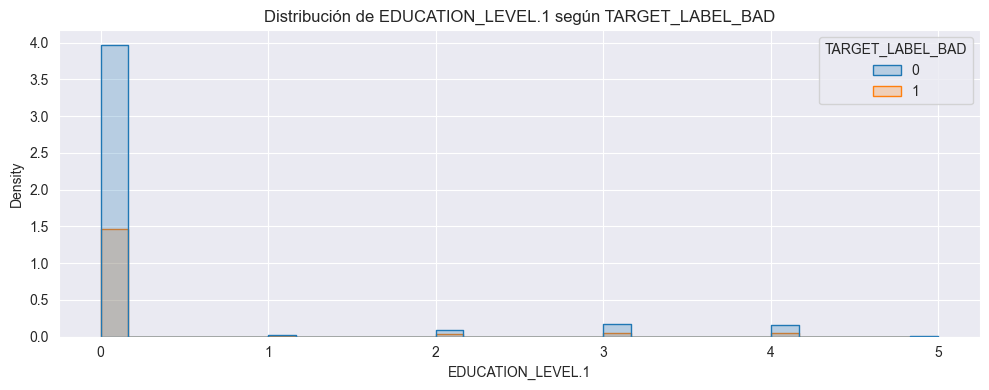

TARGET_LABEL_BAD       Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
EDUCATION_LEVEL.1_CAT                                                                   
0.0                                       73.01                    26.99           15995
1.0                                       87.50                    12.50              56
2.0                                       74.27                    25.73             342
3.0                                       78.42                    21.58             621
4.0                                       77.56                    22.44             615
5.0                                       93.94                     6.06              33
NULO                                      74.16                    25.84           32338


In [34]:
# Gráfico de distribución para EDUCATION_LEVEL.1
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="EDUCATION_LEVEL.1", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de EDUCATION_LEVEL.1 según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular nulos
nulos_edu = df["EDUCATION_LEVEL.1"].isna().sum()
porcentaje_nulos_edu = (nulos_edu / len(df)) * 100

# Rellenar nulos como categoría "NULO"
df["EDUCATION_LEVEL.1_CAT"] = df["EDUCATION_LEVEL.1"].fillna("NULO")

# Calcular proporciones
top_edu_values = df["EDUCATION_LEVEL.1_CAT"].value_counts().nlargest(15).index
edu_dist = (
    df[df["EDUCATION_LEVEL.1_CAT"].isin(top_edu_values)]
    .groupby("EDUCATION_LEVEL.1_CAT")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores (%)", 1: "Proporción Deudores (%)"})
    * 100
)

# Agregar cantidad total
edu_dist["Cantidad Total"] = df["EDUCATION_LEVEL.1_CAT"].value_counts().loc[top_edu_values]
edu_dist = edu_dist.round(2)

print(edu_dist)


**Análisis para `EDUCATION_LEVEL.1`**  
> * CASI 60% NULOS
> *

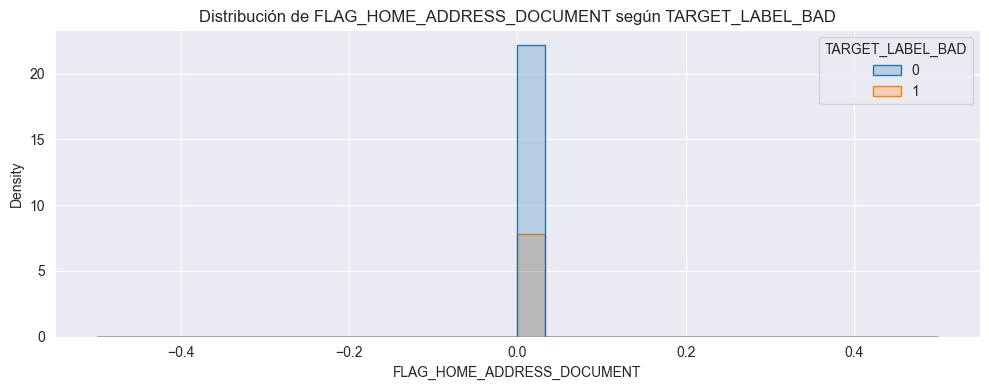

In [35]:
# Gráfico de distribución para FLAG_HOME_ADDRESS_DOCUMENT
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_HOME_ADDRESS_DOCUMENT", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_HOME_ADDRESS_DOCUMENT según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_HOME_ADDRESS_DOCUMENT`**  
> *eliminar,siempre el mismo valor

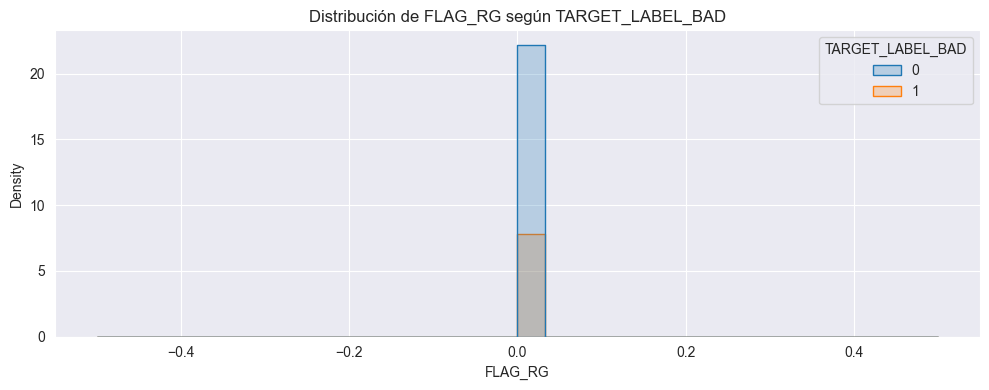

In [36]:
# Gráfico de distribución para FLAG_RG
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_RG", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_RG según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_RG`**  
> *eliminar,siempre el mismo valor


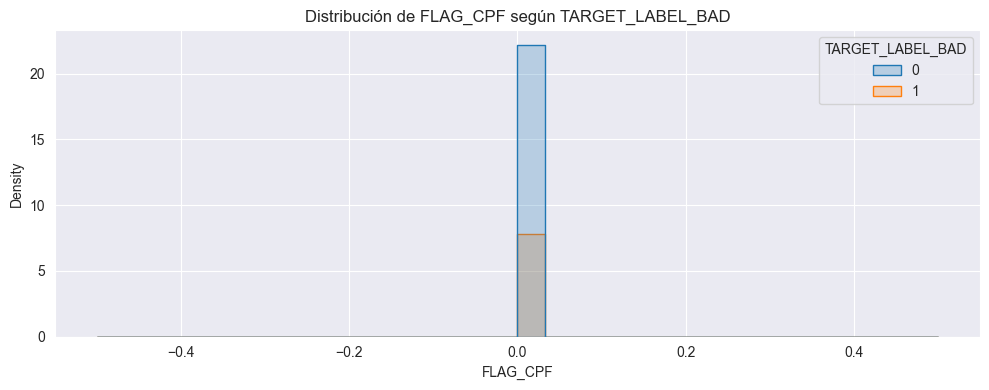

In [37]:
# Gráfico de distribución para FLAG_CPF
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_CPF", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_CPF según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_CPF`**  
> *eliminar,siempre el mismo valor


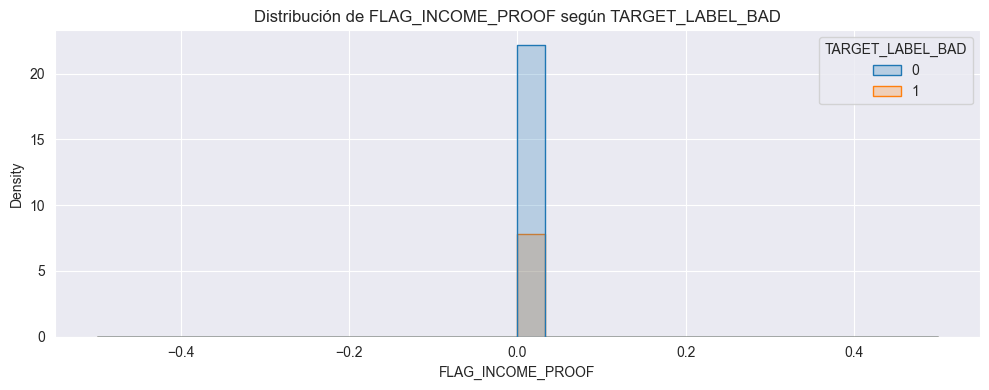

In [38]:
# Gráfico de distribución para FLAG_INCOME_PROOF
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="FLAG_INCOME_PROOF", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de FLAG_INCOME_PROOF según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

**Análisis para `FLAG_INCOME_PROOF`**  
> *eliminar,siempre el mismo valor


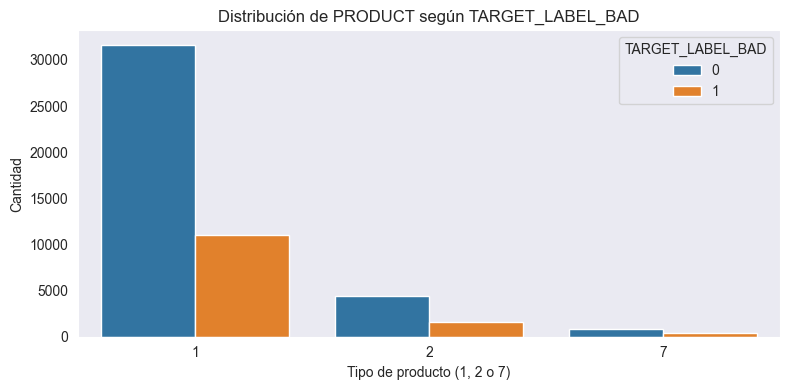

TARGET_LABEL_BAD  Proporción Pagadores (%)  Proporción Deudores (%)  Cantidad Total
PRODUCT_CAT                                                                        
1                                    74.06                    25.94           42690
2                                    74.06                    25.94            6015
7                                    68.42                    31.58            1295


In [39]:
# Gráfico de barras para PRODUCT
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="PRODUCT", hue="TARGET_LABEL_BAD")
plt.title("Distribución de PRODUCT según TARGET_LABEL_BAD")
plt.xlabel("Tipo de producto (1, 2 o 7)")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tratar valores nulos como categoría separada (aunque no haya en este caso)
df["PRODUCT_CAT"] = df["PRODUCT"].fillna("NULO")

# Calcular proporciones por valor de PRODUCT
product_dist = (
    df.groupby("PRODUCT_CAT")["TARGET_LABEL_BAD"]
    .value_counts(normalize=True)
    .unstack()
    .rename(columns={0: "Proporción Pagadores (%)", 1: "Proporción Deudores (%)"})
    * 100
)

# Agregar la cantidad total de registros por categoría
product_dist["Cantidad Total"] = df["PRODUCT_CAT"].value_counts()

# Redondear porcentajes
product_dist = product_dist.round(2)

# Mostrar la tabla
print(product_dist)



**Análisis para `PRODUCT`**  
> *PRODUCT = 1 y PRODUCT = 2 tienen el mismo perfil: 25.94% de deudores.
>
>PRODUCT = 7 muestra un aumento notable de riesgo, con 31.58% de deudores.
>
> PRODUCT = 7 tiene pocos casos (1.295), muestra una tendencia hacia mayor morosidad

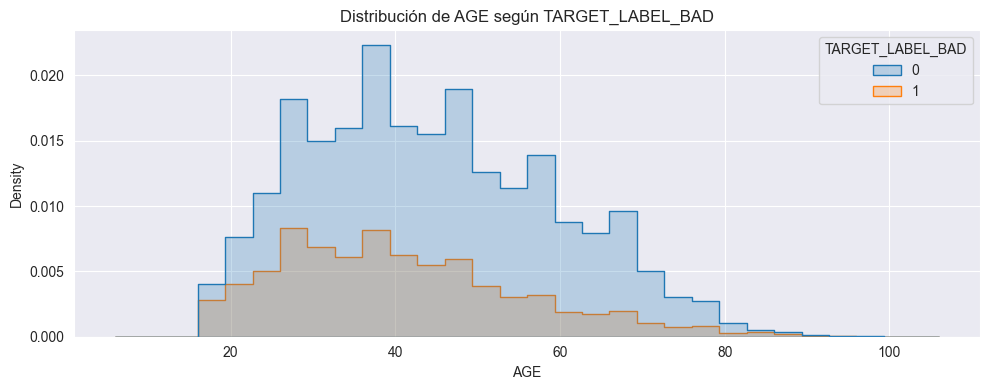

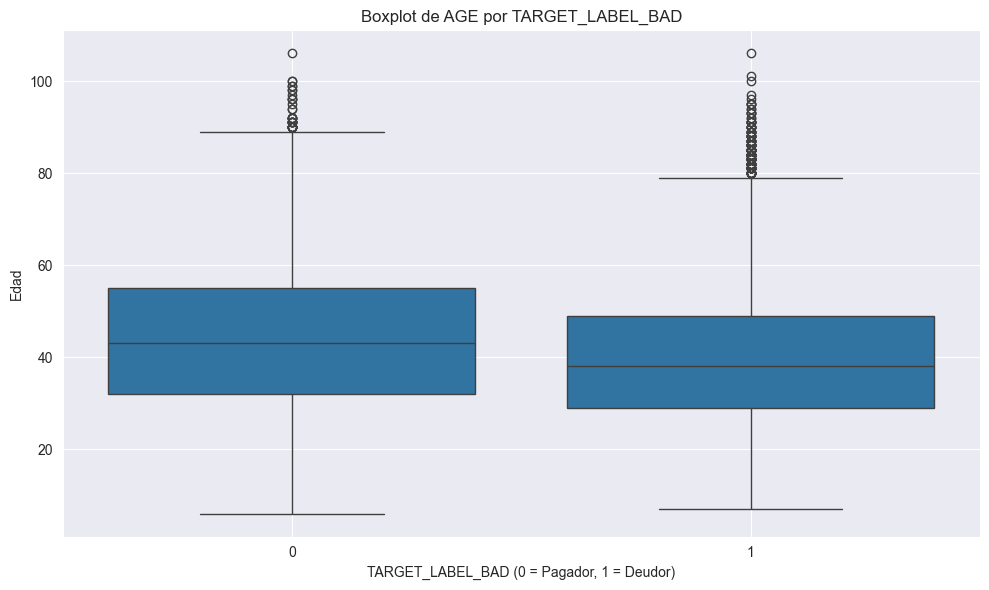

In [40]:
# Gráfico de distribución para AGE
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="AGE", hue="TARGET_LABEL_BAD", bins=30, element="step", stat="density")
plt.title("Distribución de AGE según TARGET_LABEL_BAD")
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="TARGET_LABEL_BAD", y="AGE")
plt.title("Boxplot de AGE por TARGET_LABEL_BAD")
plt.xlabel("TARGET_LABEL_BAD (0 = Pagador, 1 = Deudor)")
plt.ylabel("Edad")
plt.grid(True)
plt.tight_layout()
plt.show()


**Análisis para `AGE`**  
> *Pagadores (TARGET_LABEL_BAD = 0): Edad media: 44.2 años

> * Deudores (TARGET_LABEL_BAD = 1): Edad media: 40.5 años
> *
> Más jóvenes son más deudores

## 3. Análisis de Correlación con el label

In [41]:
correlation_matrix = numeric_df.copy()
correlation_matrix["TARGET_LABEL_BAD"] = df["TARGET_LABEL_BAD"]
correlations = correlation_matrix.corr()["TARGET_LABEL_BAD"].sort_values(ascending=False)
print(correlations)

TARGET_LABEL_BAD                  1.000000
PAYMENT_DAY                       0.070633
OCCUPATION_TYPE                   0.040216
PRODUCT                           0.019293
RESIDENCE_TYPE                    0.019168
QUANT_DEPENDANTS                  0.012157
QUANT_SPECIAL_BANKING_ACCOUNTS    0.011997
QUANT_BANKING_ACCOUNTS            0.011997
QUANT_CARS                        0.011706
OTHER_INCOMES                     0.004442
PERSONAL_MONTHLY_INCOME           0.002819
FLAG_DINERS                       0.002240
FLAG_OTHER_CARDS                  0.001410
FLAG_AMERICAN_EXPRESS             0.000337
NACIONALITY                      -0.000952
POSTAL_ADDRESS_TYPE              -0.002423
PERSONAL_ASSETS_VALUE            -0.003886
FLAG_VISA                        -0.005398
MONTHS_IN_THE_JOB                -0.007073
FLAG_EMAIL                       -0.008067
PROFESSION_CODE                  -0.011593
FLAG_MASTERCARD                  -0.017658
MONTHS_IN_RESIDENCE              -0.029336
MARITAL_STA

**Conclusión:**  
Aunque las correlaciones absolutas no son muy altas, variables como `AGE` (negativa) o `PAYMENT_DAY` (positiva) muestran cierta relación con el riesgo de incumplimiento

## 4. Preprocesamiento

In [42]:
# Imputación de nulos con mediana
["EDUCATION_LEVEL.1", "MATE_PROFESSION_CODE", "PROFESSION_CODE", "OCCUPATION_TYPE", "MONTHS_IN_RESIDENCE"]


['EDUCATION_LEVEL.1',
 'MATE_PROFESSION_CODE',
 'PROFESSION_CODE',
 'OCCUPATION_TYPE',
 'MONTHS_IN_RESIDENCE']

In [43]:
# Transformación logarítmica de variables asimétricas
 ["PERSONAL_ASSETS_VALUE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "MONTHS_IN_THE_JOB", "MONTHS_IN_RESIDENCE"]


IndentationError: unexpected indent (2022501174.py, line 2)

In [41]:
# Escalado estándar

scaled_cols = ["AGE", "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "PERSONAL_ASSETS_VALUE", "MONTHS_IN_THE_JOB"]


In [ ]:
#Tambien se pueden crear nuevas features .. tipo OTHER_CARDS .. o agrupar segmentos